# Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, I worked to understand the results of an A/B test run by an e-commerce website.  My goal is to help the company understand if they should implement the new site, keep the old one, or perhaps run the experiment longer to make a decision.

This project is part of the coursework and requirements leading to a Data Analysis Nanodegree with Udacity.


<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure getting the same answers as quizzes in Udacity
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.
a. Read in the dataset and take a look at the top few rows here:

In [44]:
# we read the dataset and look at the top five rows

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [45]:
# we count the number of rows

df.shape[0]

294478

c. The number of unique users in the dataset.

In [46]:
# we count the number of unique users in the dataset

df['user_id'].nunique()

290584

d. The proportion of users converted.

In [47]:
# we calculate the conversion proportion

df.converted.mean()

# or df[df.converted == 1].shape[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [48]:
# we check for inconsistency in the grouping

df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')) == True].shape[0] 

3893

f. Do any of the rows have missing values?

In [49]:
# we check for missing values

df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Create a new dataset removing those rows with probable wrong data.

In [50]:
# we create a new dataframe with only correct groupings

df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [51]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [52]:

df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` How many unique user_ids are in df2?

In [53]:
# we count the unique users in the new dataframe

df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [54]:
# we find the only duplicated user_id

df2.groupby(['user_id']).count().sort_values(by=['converted'], ascending=False).head(1)

,timestamp,group,landing_page,converted
user_id,,,,
773192,2,2,2,2


c. What is the row information for the repeat **user_id**? 

In [55]:
# we display the information of the duplicated user
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
# we remove one of the lines and check again

df2 = df2.drop([1899], axis = 0)
# or df2.drop(2893, inplace=True)

df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.`What is the probability of an individual converting regardless of the page they receive?

In [57]:
# we calculate the conversion probability

p = df2['converted'].sum()/df2['user_id'].count()
p

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
# we calculate the conversion probability for the control group (those viewing the old website)

p_old = df2[(df2['group'] == 'control') & (df['converted'] == 1)]['converted'].sum() / df2[df2['group'] == 'control']['user_id'].count()
p_old

D:\Anaconda3\envs\analytics\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
# we calculate the conversion probability for the tratment group (those viewing the new website)

p_new = df2[(df2['group'] == 'treatment') & (df['converted'] == 1)]['converted'].sum() / df2[df2['group'] == 'treatment']['user_id'].count()
p_new

D:\Anaconda3\envs\analytics\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.11880806551510564

In [60]:
# we calculate the observed difference

obs_diff = p_new - p_old
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [61]:
# we calculate the probability of being in the treatment group (viewing the new website)

df2[df2['landing_page'] == 'new_page']['user_id'].count() / df2['user_id'].count()
# or (df2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**The first tests applied to the data shows that there is more probability of converting a user (closing a sale) under the old website than under the new one.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, we will make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, the following would be the null and alternative hypothesis:

$$H_{0}: p_{new} - p_{old} ≤ 0 $$<br><br>
$$H_{1}: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [62]:
# we display the previously calculated conversion rate
p

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [63]:
# we display the previously calculated conversion rate
p

0.11959708724499628

c. What is $n_{new}$?

In [64]:
# we count the number of users viewing the new website

n_new = df2.query('landing_page == "new_page"').count()[0] 
n_new

145310

d. What is $n_{old}$?

In [65]:
# we count the number of users viewing the old website

n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [66]:
# we simulate a new set of conversion rates (new website)

new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p, p])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [67]:
# we simulate a new set of conversion rates (old website)

old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p, p])

g. Find $p_{new}$ - $p_{old}$ for the simulated values in part (e) and (f).

In [68]:
# we calculate the difference in the means of the newly calculated conversion rates

new_page_p = new_page_converted.mean()
old_page_p = old_page_converted.mean()

diff = new_page_p - old_page_p
diff

-0.0013510581515740888

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [69]:
# we simulate 10000 times the previous exercise by using bootstrapping

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p, p]) 
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p, p])
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    
    p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like xpected?

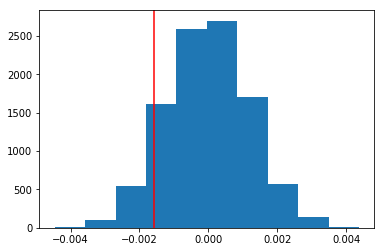

In [70]:
# we plot the differences and see a normal distribution centered around the observed difference (null hypothesis)

plt.hist(p_diffs);
plt.axvline(obs_diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [71]:
# calculating the p-value
(p_diffs > obs_diff).mean()

0.9048

k. What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j we computed the p-value for the test. The obtained value is larger than the minimal 5% expected to reject the null hypothesis. In this case, we fail to reject the null hypothesis and should continue using the old website (everything else being equal)**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [72]:
# we import statsmodel and count conversions in the dataframe for the control and treatment groups

import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['user_id'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['user_id'].count()
#n_old = [already calculated]
#n_new = [already calculated]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
# we use the proportions_ztest to compare results with the previously calculated p-value

sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value calculated with proportions_ztest is very similar to the one we calculated step by step. It gives further support to a decision to fail to reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, I will be performing a regression of type:

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [74]:
# we create the intercept, and generate dummy variables for "landing_page"

df2['intercept'] = 1
page_dummies = pd.get_dummies(df2['landing_page'])
df2 = df2.join(page_dummies)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [75]:
# we rename a column to "ab_page"
df2.rename(index=str, columns={"new_page": "ab_page"}, inplace= True)

In [76]:
# we delete an unecessary column

df2 = df2.drop('old_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [77]:
# we run a regression model

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:13:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190. The difference lies in that logistic regression is a binary test (equal to or not equal to), and binary tests are calculated by statsmodels as a two-tailed model**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Often, several factors can have an impact in a perceived change. Testing several variables can help better understand the change factors and lead to better decisions. However, adding more variables increases the probability of false-positives. To account for that, it is a good approach to apply corrections, such as the Bonferroni correction.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [79]:
# we read the file with country data

countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [80]:
# we join the two datasets using 'user_id' as key

df2 = df2.join(countries.set_index('user_id'), on='user_id', how='inner')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [81]:
# controlling that the number of rows remains unchanged
df2.shape[0]

290584

In [82]:
# we create dummy variables for the categorical data

country_dummies = pd.get_dummies(df2['country'])
df2 = df2.join(country_dummies)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [83]:
# we run a regression model

log_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results2 = log_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [84]:
# we provide the logit Regression Results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        19:13:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**The model provides p-values that are well above the 0.05 limit to reject the null hypothesis. The user's country doesn't seem to play a role in the conversion rates.** 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [85]:
# we create additional columns to test the interactino between countries and website

df2['ca_page'] = df2['CA'] * df2['ab_page']
df2['us_page'] = df2['US'] * df2['ab_page']
df2['uk_page'] = df2['UK'] * df2['ab_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ca_page,us_page,uk_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [86]:
# we run a new regression model

log_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK','ab_page', 'ca_page', 'uk_page']])
results3 = log_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [87]:
# we display the summary

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Jan 2019   Pseudo R-squ.:               3.482e-05
Time:                        19:14:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
ca_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
uk_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**The p-values obtained by fitting the model with the interaction of country and landing page don't show any significant relationship between this interaction and the conversion rates. None of these variables seems to have an impact, and none provide support for implementing the new website**